In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
data_path = 'step_torque_full.csv'
all_data = pd.read_csv(data_path)
all_data.head()

,Unnamed: 0,VSI_Motor_Speed_RR,VSI_Motor_Speed_RL,VSI_Motor_Speed_FR,VSI_Motor_Speed_FL,VSI_TrqFeedback_RR,VSI_TrqFeedback_RL,VSI_TrqFeedback_FR,VSI_TrqFeedback_FL,MISC_Pos_Trq_Limit_RR,MISC_Pos_Trq_Limit_RL,MISC_Pos_Trq_Limit_FR,MISC_Pos_Trq_Limit_FL,MISC_Neg_Trq_Limit_RR,MISC_Neg_Trq_Limit_RL,MISC_Neg_Trq_Limit_FR,MISC_Neg_Trq_Limit_FL
0,0.00,0.0,0.0,0.0,0.0,0.00000,0.0,-0.25872,-0.12936,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325
1,0.01,0.0,0.0,0.0,0.0,-0.12936,0.0,-0.12936,-0.12936,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325
2,0.02,0.0,0.0,0.0,0.0,0.00000,0.0,-0.12936,0.00000,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325
3,0.03,0.0,0.0,0.0,0.0,-0.25872,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325
4,0.04,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,-0.19325,-0.19325,-0.19325,-0.19325


In [86]:
wheel_name = 'RR'
all_data = all_data[[col for col in all_data.columns if wheel_name in col]]
all_data.head()

,VSI_Motor_Speed_RR,VSI_TrqFeedback_RR,MISC_Pos_Trq_Limit_RR,MISC_Neg_Trq_Limit_RR
0,0.0,0.00000,0.0,-0.19325
1,0.0,-0.12936,0.0,-0.19325
2,0.0,0.00000,0.0,-0.19325
3,0.0,-0.25872,0.0,-0.19325
4,0.0,0.00000,0.0,-0.19325


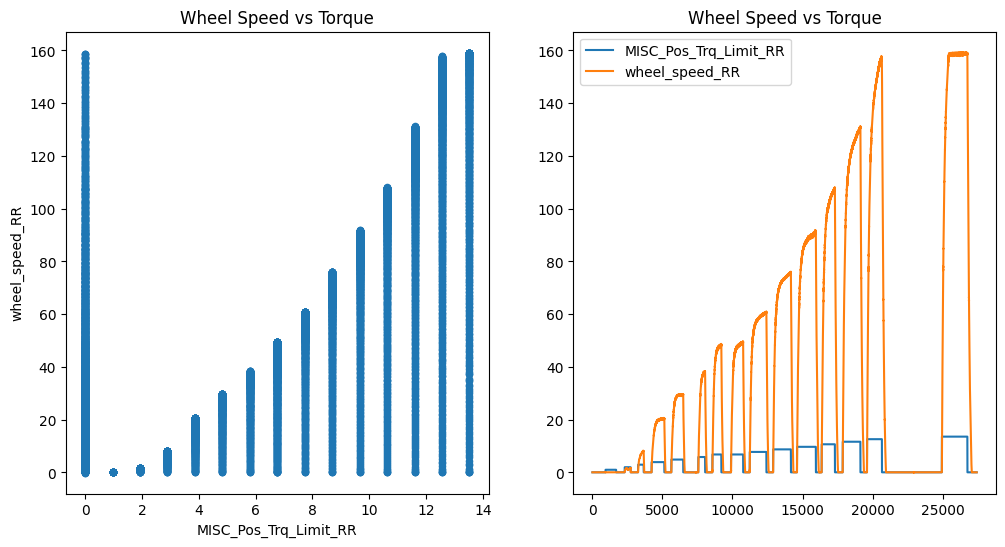

In [89]:
motor_rm_col = 'VSI_Motor_Speed_{wheel_name}'.format(wheel_name=wheel_name)
torque_col = 'MISC_Pos_Trq_Limit_{wheel_name}'.format(wheel_name=wheel_name)
# torque_col = 'VSI_TrqFeedback_{wheel_name}'.format(wheel_name=wheel_name)
wheel_speed_col = 'wheel_speed_{wheel_name}'.format(wheel_name=wheel_name)

rpm_rad_s = np.pi / (30.0 * 13.18)
all_data[wheel_speed_col] = all_data[motor_rm_col].copy() * rpm_rad_s

data = all_data[[torque_col, wheel_speed_col]]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
data.plot(x=torque_col, y=wheel_speed_col, kind='scatter', ax=ax[0], title='Wheel Speed vs Torque')
data.plot(ax=ax[1], title='Wheel Speed vs Torque')

plt.show()

In [90]:
# Save the new data
data.to_csv('step_sysid_{wheel_name}.csv'.format(wheel_name=wheel_name), index=False)